# Hey there, I create one notebook with 4 chapters. Please go to the chapter which you want to review.

# Thanks

# A. Build a baseline model

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [3]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [4]:
n_cols = predictors.shape[1] # number of predictors

In [5]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

In [6]:
# build the model
model = regression_model()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mse_A = []
for i in range(50):
    
    X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.3,train_size=0.7, random_state=123)

    model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse_A.append(mean_squared_error(y_test,y_pred))


In [8]:
mse_A

[59.417908523065684,
 56.35867071081834,
 43.731062908228196,
 42.37572364513754,
 41.799583665346816,
 41.659911991995116,
 47.54310022644941,
 57.818398199439144,
 40.726541056936476,
 38.463560758793534,
 38.72571158068016,
 38.04154499336891,
 37.56443968317347,
 39.69495876971596,
 39.87056278644042,
 39.6581582830535,
 45.28030978425696,
 37.01370284229454,
 38.73330269018553,
 46.14614558497372,
 37.165957215425294,
 38.81529866279768,
 37.75010085650167,
 46.74179693772042,
 38.71283675727304,
 37.416595327686075,
 38.03539099817266,
 55.592443211117796,
 44.80522990771867,
 59.49300129129629,
 52.19947333231346,
 45.24495694461074,
 42.29504580876804,
 40.70190394677498,
 39.67616804627648,
 40.55489425151973,
 39.64387199681782,
 45.0801020866821,
 44.68303229190708,
 46.03995792363996,
 38.64831728093989,
 40.12174845766898,
 38.12866060044866,
 40.02472424133035,
 38.142062168643434,
 54.76529288359023,
 53.273273611725735,
 48.74194404407829,
 36.217181926877885,
 37.51481

# B. Normalize the data

In [9]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

In [10]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [11]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [12]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()

In [13]:
n_cols = predictors_norm.shape[1] # number of predictors

In [14]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

In [15]:
# build the model
model = regression_model()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mse_B = []
for i in range(50):
    
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm,target,test_size=0.3,train_size=0.7, random_state=123)

    model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse_B.append(mean_squared_error(y_test,y_pred))


In [17]:
mse_B

[143.39269744964386,
 81.93725910504739,
 46.40559552931128,
 40.856319964229385,
 38.51223487418255,
 38.0038969033091,
 37.22591278754159,
 37.033200233800315,
 37.068420020053054,
 36.4429927862742,
 35.59157763323496,
 35.63381625594058,
 35.287085962349664,
 35.082954568034616,
 35.593540640258574,
 35.32269551626164,
 34.88839721330592,
 35.03578578100715,
 35.57364509640559,
 35.168743975660064,
 35.41083605948994,
 35.30624105883367,
 35.303670724000916,
 35.611883330506984,
 35.16317881177958,
 35.217220674560544,
 35.1632145211464,
 35.38412931572497,
 35.37913822953211,
 35.58254904243969,
 36.15854344034746,
 35.741904770996925,
 35.67468546451064,
 36.48943987456776,
 35.634179067508306,
 35.53366097441688,
 35.55865477181503,
 35.248877766580506,
 35.328476156794174,
 35.1086134246473,
 35.02270303773278,
 35.57300054447644,
 36.49461720103534,
 36.34729780552986,
 35.73128461289654,
 36.70841821907292,
 36.74860054544363,
 37.15939496202491,
 36.6858277308347,
 36.760367

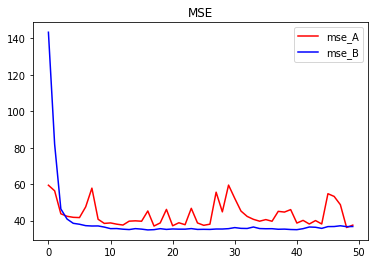

In [35]:
import matplotlib.pyplot as plt
plt.plot(mse_A, color = 'red', label = 'mse_A')
plt.plot(mse_B, color = 'blue', label = 'mse_B')
plt.title('MSE')
plt.legend()
plt.show()

## MSE decreases in compare to part A

# C. Increate the number of epochs

In [18]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [20]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [21]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()

In [22]:
n_cols = predictors_norm.shape[1] # number of predictors

In [23]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

In [24]:
# build the model
model = regression_model()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mse_C = []
for i in range(50):
    
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm,target,test_size=0.3,train_size=0.7, random_state=123)

    model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=0)
    y_pred = model.predict(X_test)
    mse_C.append(mean_squared_error(y_test,y_pred))


In [26]:
mse_C

[78.73560087277583,
 41.48537270208281,
 38.310077814124405,
 37.46396445612634,
 36.46177356551606,
 36.384692134365096,
 35.61753571949749,
 35.26729149282524,
 34.67264943283245,
 34.54960365464549,
 35.05040389235311,
 34.0606093580113,
 34.10038789773868,
 34.56205703957704,
 35.93030085132397,
 35.51467471272926,
 35.948695957422196,
 36.645935179769765,
 36.50628870229951,
 37.679349417393745,
 37.23191157109203,
 37.29570176915373,
 37.94629014826117,
 39.42691197488505,
 39.34949442736021,
 39.89842948943852,
 40.13965988122015,
 39.31379629550936,
 40.06998463698771,
 40.17518192650748,
 40.32368703077633,
 40.17659241853209,
 40.33071443120374,
 40.436743620477664,
 42.10178029743914,
 40.96792214738416,
 40.12587394218152,
 40.78069938355378,
 43.00034704869816,
 41.1017073372327,
 42.25023449239275,
 41.21332248128329,
 42.23571096799055,
 42.25897889649383,
 42.60065934012417,
 42.21968361968472,
 42.983691574411495,
 43.3665294325371,
 42.78673878329604,
 44.298882630387

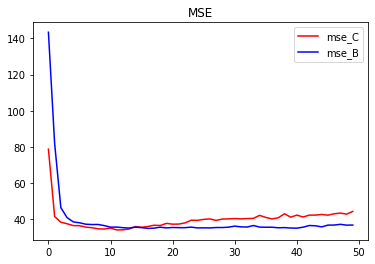

In [36]:
import matplotlib.pyplot as plt
plt.plot(mse_C, color = 'red', label = 'mse_C')
plt.plot(mse_B, color = 'blue', label = 'mse_B')
plt.title('MSE')
plt.legend()
plt.show()

## MSE increases in compare to part B

# D. Increase the number of hidden layers 

In [27]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

In [28]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')

In [29]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [30]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()

In [31]:
n_cols = predictors_norm.shape[1] # number of predictors

In [32]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mse_D = []
for i in range(50):
    
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm,target,test_size=0.3,train_size=0.7, random_state=123)

    model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=0)
    y_pred = model.predict(X_test)
    mse_D.append(mean_squared_error(y_test,y_pred))


In [34]:
mse_D

[42.74191636652065,
 42.96137967086824,
 43.764869265585375,
 43.98255789916484,
 43.43605343007823,
 44.383652979119724,
 43.30999355112725,
 45.56493408902586,
 44.39629227874998,
 43.39577015453979,
 43.34312360552156,
 43.589945340381846,
 43.82167099578563,
 43.96815661015382,
 43.97053587802093,
 44.91004270768366,
 42.92477090239264,
 45.12819703149153,
 44.26774520871767,
 43.93179931154735,
 44.26442316985068,
 44.202212072607516,
 45.129096644121454,
 44.40922536081568,
 45.10483268963433,
 43.81304959835595,
 44.0911067171939,
 43.154721128560624,
 44.74009791302549,
 44.42826004092524,
 44.601288035852,
 43.74885832060488,
 43.41096034230321,
 44.00398147904355,
 43.42618786058129,
 44.438026537215826,
 44.31014183281218,
 45.17643085441854,
 43.66980619157786,
 43.978555717647936,
 44.23077594236596,
 44.90801686827315,
 43.55457098892467,
 45.968248044321264,
 45.104017193268064,
 45.483702136255815,
 45.1647452157074,
 45.39802764930632,
 44.61116709232085,
 45.940453475

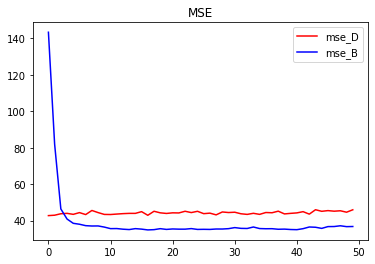

In [37]:
import matplotlib.pyplot as plt
plt.plot(mse_D, color = 'red', label = 'mse_D')
plt.plot(mse_B, color = 'blue', label = 'mse_B')
plt.title('MSE')
plt.legend()
plt.show()

# MSE increases in compare to part B

## Compare all MSEs

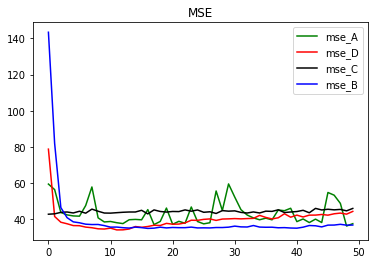

In [39]:
import matplotlib.pyplot as plt
plt.plot(mse_A, color = 'green', label = 'mse_A')
plt.plot(mse_C, color = 'red', label = 'mse_D')
plt.plot(mse_D, color = 'black', label = 'mse_C')
plt.plot(mse_B, color = 'blue', label = 'mse_B')
plt.title('MSE')
plt.legend()
plt.show()